In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import random 
from sklearn import metrics
#from paretochart import pareto

In [148]:
data=pd.read_csv("SCDB_2018_01_caseCentered_Docket.csv",encoding="unicode_escape")

In [149]:
data=data[data.columns.difference(['dateRearg','adminAction','petitionerState','caseOriginState','caseSourceState','respondentState','adminActionState','authorityDecision2','lawMinor'])]

In [150]:
data1=data.dropna()

In [151]:
data.shape

(10336, 44)

In [152]:
data1.shape

(6509, 44)

In [153]:
#data1_0=data1[data1.apply(lambda x: x['partyWinning'] == 0,axis='columns')]
#data1_1=data1[data1.apply(lambda x: x['partyWinning'] == 1,axis='columns')]


In [154]:
data1["partyWinning"].value_counts()

1.0    4085
0.0    2424
Name: partyWinning, dtype: int64

In [155]:
data1.to_csv("docket_with_date.csv")

In [156]:
data2=data1[data1.columns.difference(['chief','caseDisposition','dateArgument','caseName','caseId','docketId','caseIssuesId','voteId','usCite','sctCite','dateDecision','lexisCite','ledCite','docket'])]

In [157]:
data2.nunique()

authorityDecision1            7
caseDispositionUnusual        2
caseOrigin                  128
caseSource                   84
certReason                   13
decisionDirection             3
decisionDirectionDissent      2
decisionType                  2
declarationUncon              4
issue                       248
issueArea                    14
jurisdiction                  5
lawSupp                     170
lawType                       8
lcDisagreement                2
lcDisposition                12
lcDispositionDirection        3
majOpinAssigner              22
majOpinWriter                36
majVotes                      6
minVotes                      5
naturalCourt                 31
partyWinning                  2
petitioner                  251
precedentAlteration           2
respondent                  239
splitVote                     1
term                         66
threeJudgeFdc                 2
voteUnclear                   2
dtype: int64

In [158]:
col_names=data2.columns

col_names2=[]
for col in col_names:

    if col=='chief':
 
             data2[col] = data2[col].astype('category',copy=False)
             col_names2.append(col)
        
    else :
        
        continue
    

   for col in col_names2:
                data2[col] = data2[col].cat.codes  

In [159]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 0 to 9799
Data columns (total 30 columns):
authorityDecision1          6509 non-null float64
caseDispositionUnusual      6509 non-null float64
caseOrigin                  6509 non-null float64
caseSource                  6509 non-null float64
certReason                  6509 non-null float64
decisionDirection           6509 non-null float64
decisionDirectionDissent    6509 non-null float64
decisionType                6509 non-null int64
declarationUncon            6509 non-null float64
issue                       6509 non-null float64
issueArea                   6509 non-null float64
jurisdiction                6509 non-null int64
lawSupp                     6509 non-null float64
lawType                     6509 non-null float64
lcDisagreement              6509 non-null float64
lcDisposition               6509 non-null float64
lcDispositionDirection      6509 non-null float64
majOpinAssigner             6509 non-null float

In [160]:
Target=data2['partyWinning']
X=data2[data2.columns.difference(['partyWinning'])]
#data1.groupby(['chief'])['partyWinning'].value_counts()

In [161]:
#data1.groupby(['jurisdiction'])['lawType'].value_counts()

# CART variable selection

In [162]:
from   sklearn.model_selection import  cross_val_score
from   sklearn.tree            import  DecisionTreeClassifier
import matplotlib.pyplot       as      plt
import numpy                   as      np

In [163]:
clf       = DecisionTreeClassifier(criterion='gini',random_state=0)

In [164]:
fit       = clf.fit(X,Target)

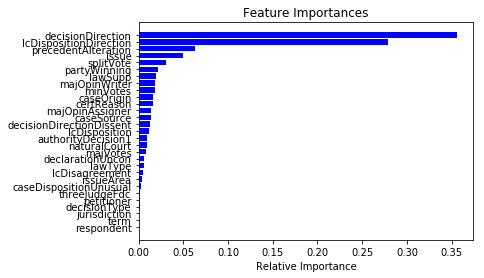

In [165]:
features    = data2.columns
importances = fit.feature_importances_
indices     = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### It can be  seen that the most important feature is decision direction,lcDispositiondirection,precedent alteration,issue,split vote

In [166]:
y=Target

### Spliiting into training and testing datasets

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

# Building the CART model

In [168]:
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 100,
                             min_samples_leaf = 10,
                             max_depth = 50)

In [169]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [170]:
pred_y_train = clf.predict(X_train)
pred_y_train


array([ 0.,  1.,  0., ...,  1.,  0.,  0.])

In [171]:
pred_y_test = clf.predict(X_test)
pred_y_test

array([ 1.,  1.,  0., ...,  1.,  0.,  1.])

In [172]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, pred_y_train)
score

0.94490781387181744

In [173]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred_y_test)
score

0.93855606758832566

In [174]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y_test)

array([[ 677,   40],
       [  80, 1156]])

In [175]:
pred_y_train = clf.predict(X_train )
pred_y_train


array([ 0.,  1.,  0., ...,  1.,  0.,  0.])

### classification accuracy of our model

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.94490781387181744

In [177]:
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Won", "Lost"] , yticklabels = ["Won", "Lost"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

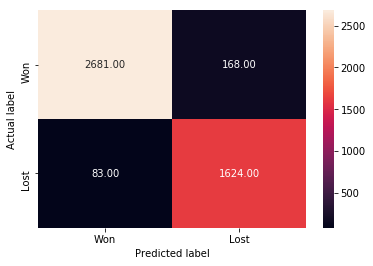

In [178]:
draw_cm( y_train, pred_y_train)

In [179]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_train,pred_y_train), 2 ) )

Total Accuracy :  0.94


In [180]:
print( 'Precision : ',np.round( metrics.precision_score( y_train,pred_y_train ), 2 ) )

Precision :  0.97


In [181]:
print( 'Recall : ',np.round( metrics.recall_score( y_train,pred_y_train ), 2 ) )

Recall :  0.94


In [182]:
cm1 = metrics.confusion_matrix( y_train, pred_y_train, [1,0] )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [183]:
print('Specificity : ', ( specificity, 2 ) )

Specificity :  (0.95137668424135913, 2)


In [184]:
y_train_prob = clf.predict_proba(X_train)

In [185]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)


0.98869550627019875

In [186]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

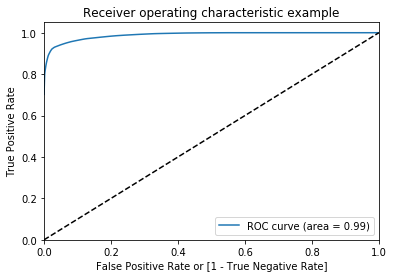

In [187]:
fpr, tpr, thresholds = draw_roc( y_train,y_train_prob[:,1] )

### Accuracy of the test set

In [188]:
pred_y_test = clf.predict(X_test)
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.93855606758832566

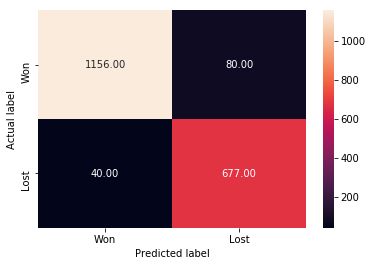

In [189]:
draw_cm( y_test, pred_y_test)

In [190]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test,pred_y_test), 2 ) )

Total Accuracy :  0.94


In [191]:
print( 'Precision : ',np.round( metrics.precision_score( y_test,pred_y_test ), 2 ) )

Precision :  0.97


In [192]:
print( 'Recall : ',np.round( metrics.recall_score( y_test,pred_y_test ), 2 ) )

Recall :  0.94


In [193]:
cm1 = metrics.confusion_matrix( y_test, pred_y_test, [1,0] )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [194]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.94


In [195]:
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.97258782322965609

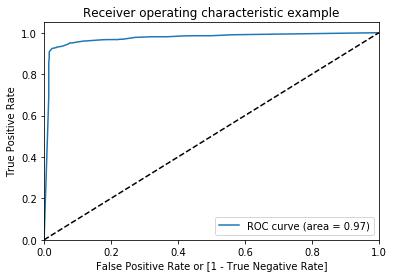

In [196]:
fpr, tpr, thresholds = draw_roc( y_test,y_test_prob[:,1] )

### Cross validation function¶

In [197]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_train , y_train, cv = 10, scoring='roc_auc')

scores.std()

0.017508090429611094

In [198]:
scores.mean()

0.96528417090330676

#### Tuning the Classifier using GridSearchCV

In [199]:
from sklearn.grid_search import GridSearchCV

In [200]:
param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,10),
              }

In [201]:
tree_cv  = GridSearchCV(clf, param_dist, cv = 10, 
                        scoring = 'roc_auc', verbose = 100)


In [202]:
tree_cv.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.685103 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.690664 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.604176 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.693711 -   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 ................

[CV] ............ criterion=gini, max_depth=7, score=0.959865 -   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.962901 -   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.0s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.877296 -   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.973510 -   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.972043 -   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45

[CV] ......... criterion=entropy, max_depth=3, score=0.668973 -   0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.3s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.846445 -   0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    2.3s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.835036 -   0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    2.4s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.719544 -   0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    2.4s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.835283 -   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84

[CV] ......... criterion=entropy, max_depth=8, score=0.965179 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.974376 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.960660 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.984383 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.960521 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.965918 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.879778 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] .

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=100)

In [203]:
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))

Tuned Decision Tree parameter : {'criterion': 'gini', 'max_depth': 8}


## CART-Building the model with best parameters

In [204]:
classifier = tree_cv.best_estimator_

In [205]:
classifier=classifier.fit(X_train,y_train)

In [206]:
pred_y_train = clf.predict(X_train)
score_h = accuracy_score(y_train, pred_y_train)
score_h

0.94490781387181744

In [207]:
y_train_prob = classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_train = auc(fpr, tpr)
auc_train

0.98591063617425645

In [208]:
pred_y_test = clf.predict(X_test)
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.93855606758832566

In [209]:
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_test = auc(fpr, tpr)
auc_test

0.97394585042856563

#### Rank Ordering

In [210]:
drank=X_train
drank['partyWinning']=y_train

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [211]:
drank["prob_score"] = y_train_prob[:,1]
drank["prob_score"] 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2075    0.028926
9638    0.998425
5444    0.363636
3348    1.000000
8343    0.992515
6828    0.992515
7662    0.002439
4758    0.473684
9329    0.992000
1463    1.000000
7521    1.000000
6003    0.805556
4950    0.000000
937     0.000000
2083    0.058824
3529    1.000000
4958    0.998425
7943    1.000000
271     0.992515
8217    0.998425
1477    0.346939
2287    0.000000
9396    0.454545
1498    1.000000
8893    0.998425
6220    0.992000
8982    0.086093
5660    0.473684
957     0.050000
7586    1.000000
          ...   
6124    0.992515
5424    0.086093
7267    0.028926
721     0.989474
7927    0.992515
4021    1.000000
9741    0.805556
8720    0.998425
4836    0.998425
6350    0.508772
5800    0.002439
6894    0.000000
3658    0.009709
872     0.000000
5451    0.222222
5131    0.058824
2295    0.992515
510     0.931034
3462    0.992515
9443    0.916667
5572    0.086093
89      0.840000
9611    0.086093
9415    0.992515
161     0.028926
3306    1.000000
9460    0.222222
3143    1.0000

#### scoring step
#### decile code

In [212]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s) 

In [213]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

In [214]:
Rank = Rank_Ordering(drank,"prob_score","partyWinning")
Rank

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
8,10,1.000000,1.000000,1.000000,732.0,732.0,0.0,100.000000,732.0,0.0,0.256932,0.000000,0.256932
7,9,0.998425,0.998425,0.998425,635.0,634.0,1.0,99.842520,1366.0,1.0,0.479466,0.000586,0.478881
6,7,0.992515,0.992515,0.992515,668.0,663.0,5.0,99.251497,2029.0,6.0,0.712180,0.003515,0.708665
5,6,0.992000,0.992000,0.992000,250.0,248.0,2.0,99.200000,2277.0,8.0,0.799228,0.004687,0.794541
4,5,0.508772,0.989474,0.843424,479.0,404.0,75.0,84.342380,2681.0,83.0,0.941032,0.048623,0.892409
3,4,0.130952,0.473684,0.269488,449.0,121.0,328.0,26.948775,2802.0,411.0,0.983503,0.240773,0.742730
2,3,0.050000,0.105263,0.084282,439.0,37.0,402.0,8.428246,2839.0,813.0,0.996490,0.476274,0.520216
1,2,0.002439,0.028926,0.012376,808.0,10.0,798.0,1.237624,2849.0,1611.0,1.000000,0.943761,0.056239
0,1,0.000000,0.000000,0.000000,96.0,0.0,96.0,0.000000,2849.0,1707.0,1.000000,1.000000,0.000000


In [215]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

gini(drank["prob_score"])

0.3641130184150296

#### Let us see the Rank Ordering on Test Data

In [216]:
dranktest=X_test
dranktest['partyWinning']=y_test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [217]:
dranktest["prob_score"] = y_test_prob[:,1]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [218]:
Rank_test = Rank_Ordering(dranktest,"prob_score","partyWinning")
Rank_test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
8,10,1.000000,1.000000,1.000000,296.0,293.0,3.0,98.986486,293.0,3.0,0.237055,0.004184,0.232871
7,9,0.998425,0.998425,0.998425,289.0,286.0,3.0,98.961938,579.0,6.0,0.468447,0.008368,0.460078
6,8,0.992515,0.992515,0.992515,304.0,302.0,2.0,99.342105,881.0,8.0,0.712783,0.011158,0.701626
5,6,0.992000,0.992000,0.992000,107.0,105.0,2.0,98.130841,986.0,10.0,0.797735,0.013947,0.783788
4,5,0.677419,0.989474,0.891588,177.0,161.0,16.0,90.960452,1147.0,26.0,0.927994,0.036262,0.891731
3,4,0.105263,0.600000,0.283411,206.0,58.0,148.0,28.155340,1205.0,174.0,0.974919,0.242678,0.732241
2,3,0.050000,0.103226,0.084301,205.0,18.0,187.0,8.780488,1223.0,361.0,0.989482,0.503487,0.485995
1,2,0.002439,0.028926,0.013355,329.0,10.0,319.0,3.039514,1233.0,680.0,0.997573,0.948396,0.049177
0,1,0.000000,0.000000,0.000000,40.0,3.0,37.0,7.500000,1236.0,717.0,1.000000,1.000000,0.000000


In [219]:
y_test.value_counts()

1.0    1236
0.0     717
Name: partyWinning, dtype: int64

In [220]:
rr=1236*100/(1236+717)

In [221]:
Rank_test['rrate']/rr

8    1.564083
7    1.563695
6    1.569702
5    1.550563
4    1.437263
3    0.444882
2    0.138740
1    0.048027
0    0.118507
Name: rrate, dtype: float64

# Building Model on Random Forest

###### Scaling the data

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [223]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf=rnd_clf.fit(X_train,y_train)
rnd_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [224]:
rf_pred_y_train = rnd_clf.predict(X_train)
rf_pred_y_train
X_train.head()

,authorityDecision1,caseDispositionUnusual,caseOrigin,caseSource,certReason,decisionDirection,decisionDirectionDissent,decisionType,declarationUncon,issue,...,majVotes,minVotes,naturalCourt,petitioner,precedentAlteration,respondent,splitVote,term,threeJudgeFdc,voteUnclear
2075,4.0,0.0,94.0,22.0,12.0,1.0,0.0,1,1.0,20280.0,...,8,0,1406,27.0,0.0,106.0,1,1960,0.0,0.0
9638,4.0,0.0,48.0,29.0,12.0,1.0,0.0,1,1.0,30060.0,...,6,3,1703,327.0,0.0,149.0,1,2009,0.0,0.0
5444,2.0,0.0,302.0,301.0,12.0,1.0,0.0,1,1.0,80060.0,...,6,3,1506,28.0,0.0,208.0,1,1978,0.0,0.0
3348,2.0,0.0,26.0,26.0,12.0,2.0,0.0,1,1.0,60030.0,...,8,0,1410,111.0,0.0,28.0,1,1967,0.0,0.0
8343,4.0,0.0,48.0,29.0,2.0,2.0,0.0,1,1.0,120010.0,...,9,0,1607,27.0,0.0,240.0,1,1996,0.0,0.0


#### Classification accuracy of the model

In [225]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, rf_pred_y_train)
score

0.99758560140474095

In [226]:
print( 'Total Accuracy : ',( metrics.accuracy_score( y_train,rf_pred_y_train)) )
print( 'Precision : ',( metrics.precision_score( y_train,rf_pred_y_train ) ) )
print( 'Recall : ',( metrics.recall_score( y_train,rf_pred_y_train )) )
cm1 = metrics.confusion_matrix( y_train, rf_pred_y_train, [1,0] )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', ( specificity ) )


Total Accuracy :  0.997585601405
Precision :  0.999296270232
Recall :  0.996840996841
Specificity :  0.998828353837


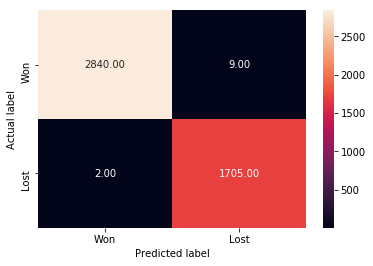

In [227]:
draw_cm( y_train, rf_pred_y_train)

#### AUC

In [228]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,confusion_matrix

rf_y_train_prob = rnd_clf.predict_proba(X_train)
fpr, tpr, thresholds =  roc_curve(y_train, rf_y_train_prob[:,1])
auc(fpr, tpr)

0.99990253417318442

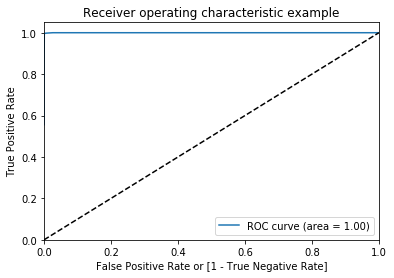

In [229]:
fpr, tpr, thresholds = draw_roc( y_train,rf_y_train_prob[:,1] )

#### Checking for Test data

In [230]:
rf_pred_y_test = rnd_clf.predict(X_test)
rf_pred_y_test

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

####  classification accuracy of RF model


In [231]:
score_test = accuracy_score(y_test, rf_pred_y_test)
score_test


0.90373783922171014

In [232]:
print( 'Total Accuracy : ',( metrics.accuracy_score( y_test,rf_pred_y_test)) )
print( 'Precision : ',( metrics.precision_score( y_test,rf_pred_y_test ) ) )
print( 'Recall : ',( metrics.recall_score( y_test,rf_pred_y_test )) )
cm1 = metrics.confusion_matrix( y_test, rf_pred_y_test, [1,0] )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', ( specificity ) )


Total Accuracy :  0.903737839222
Precision :  0.919871794872
Recall :  0.928802588997
Specificity :  0.860529986053


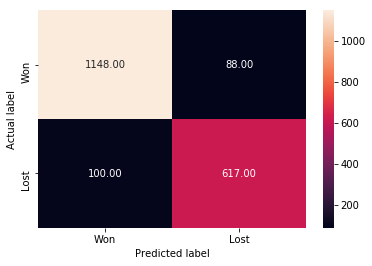

In [233]:
draw_cm( y_test, rf_pred_y_test)

In [234]:
rf_y_test_prob = rnd_clf.predict_proba(X_test)
fpr, tpr, thresholds =  roc_curve(y_test, rf_y_test_prob[:,1])
auc(fpr, tpr)

0.95889301882619504

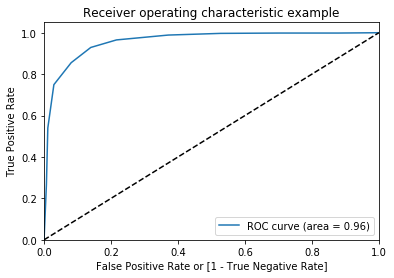

In [235]:
fpr, tpr, thresholds = draw_roc( y_test,rf_y_test_prob[:,1] )

In [236]:
from sklearn import model_selection
scores = model_selection.cross_val_score(rnd_clf, X_train, y_train, cv = 10, scoring='roc_auc')
scores.mean()

0.94559611076558381

In [237]:
scores.std()

0.011862132534871847

In [238]:
X_train.head()

,authorityDecision1,caseDispositionUnusual,caseOrigin,caseSource,certReason,decisionDirection,decisionDirectionDissent,decisionType,declarationUncon,issue,...,majVotes,minVotes,naturalCourt,petitioner,precedentAlteration,respondent,splitVote,term,threeJudgeFdc,voteUnclear
2075,4.0,0.0,94.0,22.0,12.0,1.0,0.0,1,1.0,20280.0,...,8,0,1406,27.0,0.0,106.0,1,1960,0.0,0.0
9638,4.0,0.0,48.0,29.0,12.0,1.0,0.0,1,1.0,30060.0,...,6,3,1703,327.0,0.0,149.0,1,2009,0.0,0.0
5444,2.0,0.0,302.0,301.0,12.0,1.0,0.0,1,1.0,80060.0,...,6,3,1506,28.0,0.0,208.0,1,1978,0.0,0.0
3348,2.0,0.0,26.0,26.0,12.0,2.0,0.0,1,1.0,60030.0,...,8,0,1410,111.0,0.0,28.0,1,1967,0.0,0.0
8343,4.0,0.0,48.0,29.0,2.0,2.0,0.0,1,1.0,120010.0,...,9,0,1607,27.0,0.0,240.0,1,1996,0.0,0.0


In [239]:
feature_imp = pd.Series(rnd_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False) 
feature_imp

lcDispositionDirection      0.200091
decisionDirection           0.127512
respondent                  0.083139
petitioner                  0.062717
issue                       0.057913
term                        0.052997
majOpinWriter               0.043280
caseOrigin                  0.038942
caseSource                  0.036370
lawSupp                     0.035503
naturalCourt                0.032978
majOpinAssigner             0.032785
issueArea                   0.028587
certReason                  0.025288
majVotes                    0.022996
lcDisposition               0.022798
minVotes                    0.022322
declarationUncon            0.017606
lawType                     0.015023
authorityDecision1          0.012318
lcDisagreement              0.008924
caseDispositionUnusual      0.004990
jurisdiction                0.004372
decisionDirectionDissent    0.003946
decisionType                0.002446
precedentAlteration         0.001850
voteUnclear                 0.001177
t

No handles with labels found to put in legend.


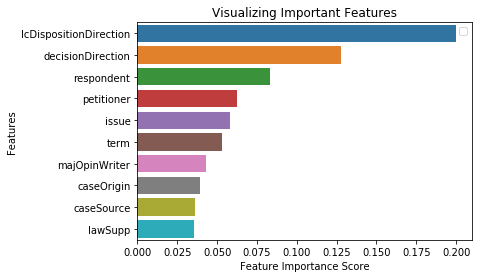

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp=feature_imp[0:10,]

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Building RF model with best parameters

In [241]:
import time
from sklearn.grid_search import GridSearchCV

In [242]:
np.random.seed(20)
start = time.time()

param_dist = {
    
              'n_estimators':np.arange(1,10),
              'max_depth': np.arange(1,10),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rnd_clf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'n_estimators': 7}
Time taken in grid search:  348.16


In [243]:
rf_classifier = cv_rf.best_estimator_
rf_classifier=rf_classifier.fit(X_train,y_train)
rf_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=7, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### Accuracy

In [244]:
rf_pred_y_train = rf_classifier.predict(X_train)
rf_pred_y_train

array([ 0.,  1.,  1., ...,  1.,  0.,  0.])

In [245]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, rf_pred_y_train)
score


0.96861281826163304

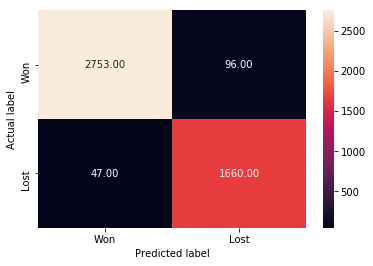

In [246]:
draw_cm( y_train, rf_pred_y_train)

In [247]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_train,rf_pred_y_train), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_train,rf_pred_y_train ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_train,rf_pred_y_train ), 2 ) )
cm1 = metrics.confusion_matrix( y_train, rf_pred_y_train, [1,0] )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )


Total Accuracy :  0.97
Precision :  0.98
Recall :  0.97
Specificity :  0.97


In [248]:
rf_pred_y_test = rf_classifier.predict(X_test)
rf_pred_y_test

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

In [249]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, rf_pred_y_test)
score

0.94060419866871481

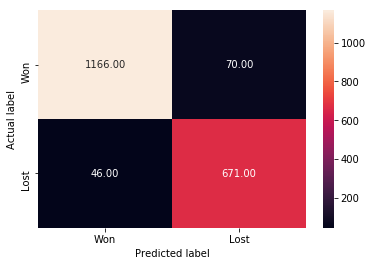

In [250]:
draw_cm( y_test, rf_pred_y_test)

In [251]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test,rf_pred_y_test), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test,rf_pred_y_test ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test,rf_pred_y_test ), 2 ) )
cm1 = metrics.confusion_matrix( y_test, rf_pred_y_test, [1,0] )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )


Total Accuracy :  0.94
Precision :  0.96
Recall :  0.94
Specificity :  0.94


#### AUC

In [252]:
cl_rf_y_train_prob = rf_classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, cl_rf_y_train_prob[:,1])
auc_train = auc(fpr, tpr)
auc_train

0.99132338236028905

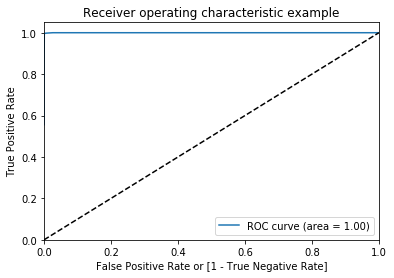

In [253]:
fpr, tpr, thresholds = draw_roc( y_train,rf_y_train_prob[:,1] )

In [254]:
cl_rf_y_test_prob = rf_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, cl_rf_y_test_prob[:,1])
auc_test = auc(fpr, tpr)
auc_test

0.97502854847372855

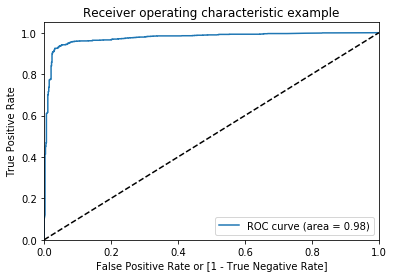

In [255]:
fpr, tpr, thresholds = draw_roc( y_test,cl_rf_y_test_prob[:,1] )

#### k-fold cross-validation for RF best classifier

In [256]:
scores = cross_val_score(rf_classifier, X_train , y_train, cv = 10, scoring='roc_auc')


In [257]:
scores.mean()

0.97182129389715555

In [258]:
scores.std()

0.0085630572872786321

In [259]:
feature_imp = pd.Series(rf_classifier.feature_importances_,index=X_train.columns).sort_values(ascending=False) 
feature_imp

lcDispositionDirection      0.482172
decisionDirection           0.223935
respondent                  0.061526
issue                       0.036140
petitioner                  0.025728
declarationUncon            0.020747
term                        0.016900
caseSource                  0.014767
majOpinWriter               0.014388
decisionDirectionDissent    0.013866
lcDisagreement              0.012574
caseOrigin                  0.012425
lawSupp                     0.011237
majOpinAssigner             0.010604
lcDisposition               0.010026
naturalCourt                0.007019
certReason                  0.006606
majVotes                    0.005429
minVotes                    0.004501
authorityDecision1          0.003314
lawType                     0.002569
issueArea                   0.001935
decisionType                0.000723
caseDispositionUnusual      0.000461
precedentAlteration         0.000362
voteUnclear                 0.000045
jurisdiction                0.000000
t

No handles with labels found to put in legend.


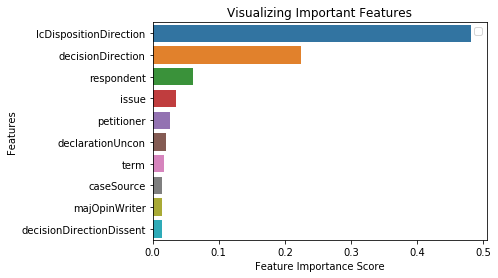

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp=feature_imp[0:10,]

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XG BOOST

In [261]:
import xgboost as xgb

In [262]:
from xgboost.sklearn import XGBClassifier

In [263]:
model = XGBClassifier()

In [264]:
model=model.fit(X_train,y_train)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [265]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### XgBoost Model Accuracy

In [266]:
pred_y_train = model.predict(X_train)
pred_y_train

array([ 0.,  1.,  1., ...,  1.,  0.,  0.])

In [267]:
score = accuracy_score(y_train, pred_y_train)
score

0.92800702370500443

#### Test Accuracy of XgBoost Model

In [268]:
pred_y_test = model.predict(X_test)
pred_y_test

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

In [269]:
score = accuracy_score(y_test, pred_y_test)
score

0.90988223246287758

#### AUC of  XgBoost model

In [270]:
y_train_prob = model.predict_proba(X_train)
fpr, tpr, thresholds =  roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.97667461815089229

#### AUC of XgBoost test data

In [271]:
y_test_prob = model.predict_proba(X_test)
fpr, tpr, thresholds =  roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.96791963999584751

## Randomized Search to find best XgBoost parameters

In [272]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBClassifier(nthreads=-1)

In [273]:
from sklearn.model_selection import RandomizedSearchCV

tree_cv = RandomizedSearchCV(xgbreg, params, n_jobs=1)  

In [274]:
tree_cv=tree_cv.fit(X_train, y_train)  

In [275]:
xgclassifier = tree_cv.best_estimator_
xgclassifier=xgclassifier.fit(X_train,y_train)

In [276]:
xgclassifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.93891731260421862, gamma=0.80070270930451937,
       learning_rate=0.14366599432773533, max_delta_step=0, max_depth=4,
       min_child_weight=24.853989494765433, missing=None, n_estimators=39,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=2.6922736267896514, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.90325871205172958)

#### AUC of Xgboost model usin best estimator

In [277]:
y_train_prob = xgclassifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_train = auc(fpr, tpr)
auc_train

0.97657396515041506

#### AUC of Xgboost best estimator on   test data 

In [278]:
y_test_prob = xgclassifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_test = auc(fpr, tpr)
auc_test

0.97167551330832813

#### Accuracy of XGboost model with best estimators

In [279]:
pred_y_train = xgclassifier.predict(X_train)
pred_y_train

array([ 0.,  1.,  1., ...,  1.,  0.,  0.])

In [280]:
score_train = accuracy_score(y_train, pred_y_train)
score_train

0.95280948200175597

#### Accuracy of XGboost model on test data with best estimators

In [281]:
pred_y_test = xgclassifier.predict(X_test)
pred_y_test

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

In [282]:
score_test = accuracy_score(y_test, pred_y_test)
score_test

0.95135688684075781

#### Cross Validation for XGboost model with best estimators

In [283]:
scores = model_selection.cross_val_score(xgclassifier, X_train, y_train, cv = 10, scoring='roc_auc')
scores.mean()

0.97251882817554214

In [284]:
scores.std()

0.0059348796869321315

In [285]:
feature_imp = pd.Series(xgclassifier.feature_importances_,index=X_train.columns).sort_values(ascending=False) 
feature_imp

decisionDirection           0.187311
lcDispositionDirection      0.126888
respondent                  0.111782
petitioner                  0.078550
caseSource                  0.054381
majOpinAssigner             0.051360
naturalCourt                0.048338
certReason                  0.042296
term                        0.042296
minVotes                    0.036254
lcDisagreement              0.033233
lawSupp                     0.030211
issue                       0.030211
lcDisposition               0.030211
majVotes                    0.027190
declarationUncon            0.024169
majOpinWriter               0.018127
caseOrigin                  0.018127
authorityDecision1          0.009063
issueArea                   0.000000
jurisdiction                0.000000
decisionType                0.000000
decisionDirectionDissent    0.000000
lawType                     0.000000
threeJudgeFdc               0.000000
precedentAlteration         0.000000
splitVote                   0.000000
c

No handles with labels found to put in legend.


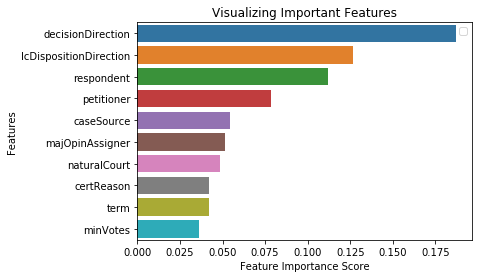

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp=feature_imp[0:10,]

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

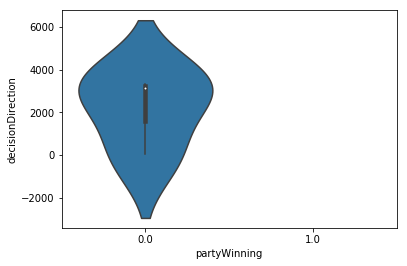

In [287]:
import seaborn as sns
sns.violinplot(x=data2['partyWinning'],y=data2['decisionDirection'].value_counts())

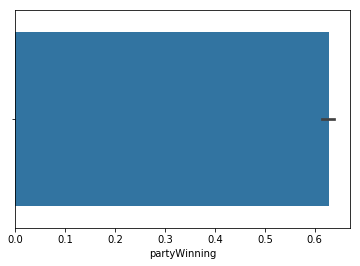

In [288]:
sns.barplot(data2['partyWinning'],hue=data2['lcDispositionDirection'].value_counts())

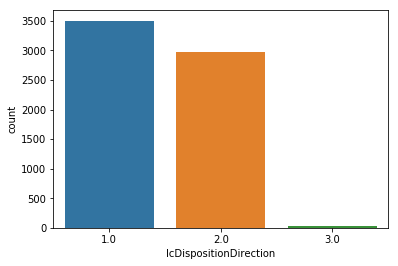

In [289]:
sns.countplot(data2['lcDispositionDirection'])

In [290]:
clarity_color_table = pd.crosstab(index=data2['lcDispositionDirection'], 
                          columns=data2['partyWinning'])

clarity_color_table

partyWinning,0.0,1.0
lcDispositionDirection,,
1.0,1287,2215
2.0,1123,1853
3.0,14,17


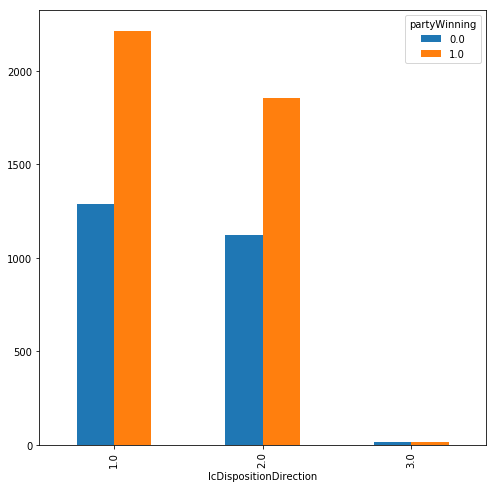

In [291]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [292]:
clarity_color_table1 = pd.crosstab(index=data2['decisionDirection'], 
                          columns=data2['partyWinning'])

clarity_color_table1

partyWinning,0.0,1.0
decisionDirection,,
1.0,1289,1841
2.0,1120,2227
3.0,15,17


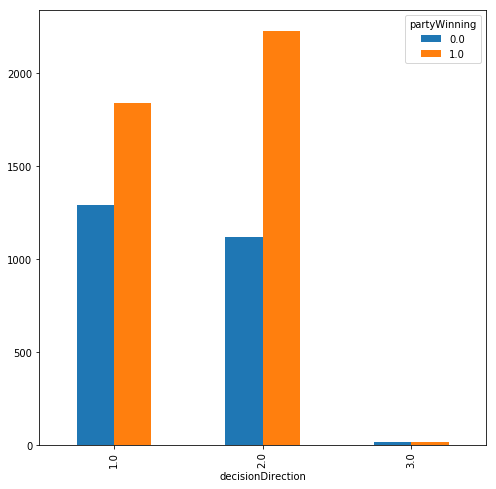

In [293]:
clarity_color_table1.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

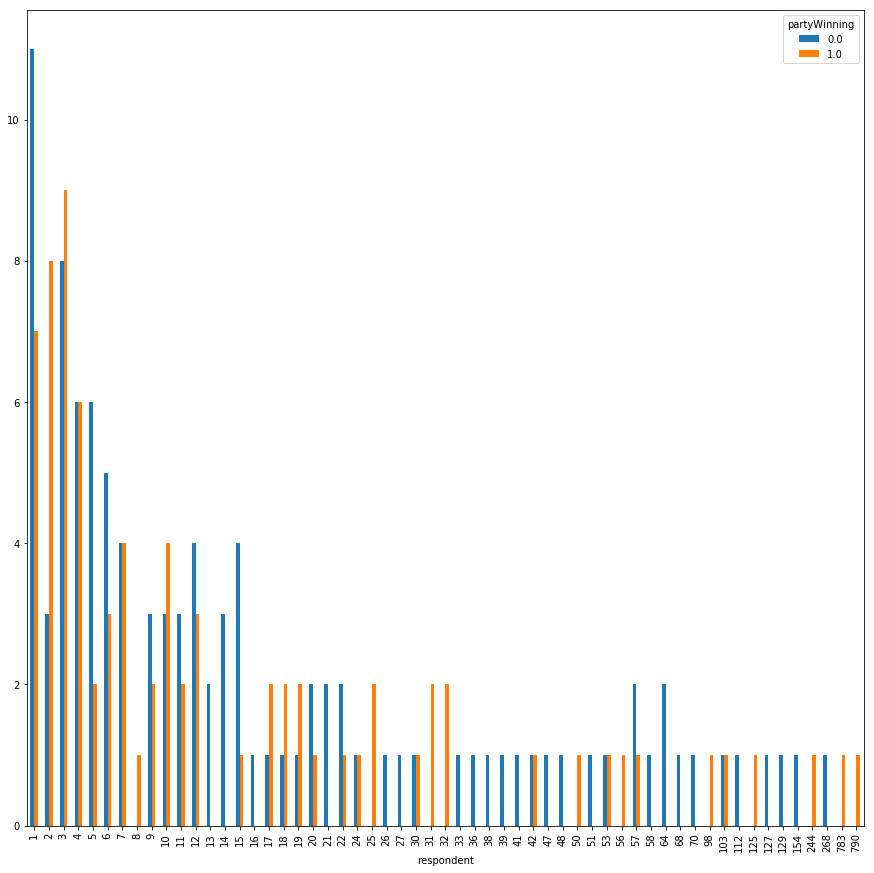

In [294]:
clarity_color_table2 = pd.crosstab(index=data2['respondent'].value_counts(), 
                          columns=data2['partyWinning'])
clarity_color_table2.plot(kind="bar", 
                 figsize=(15,15),
                 stacked=False)

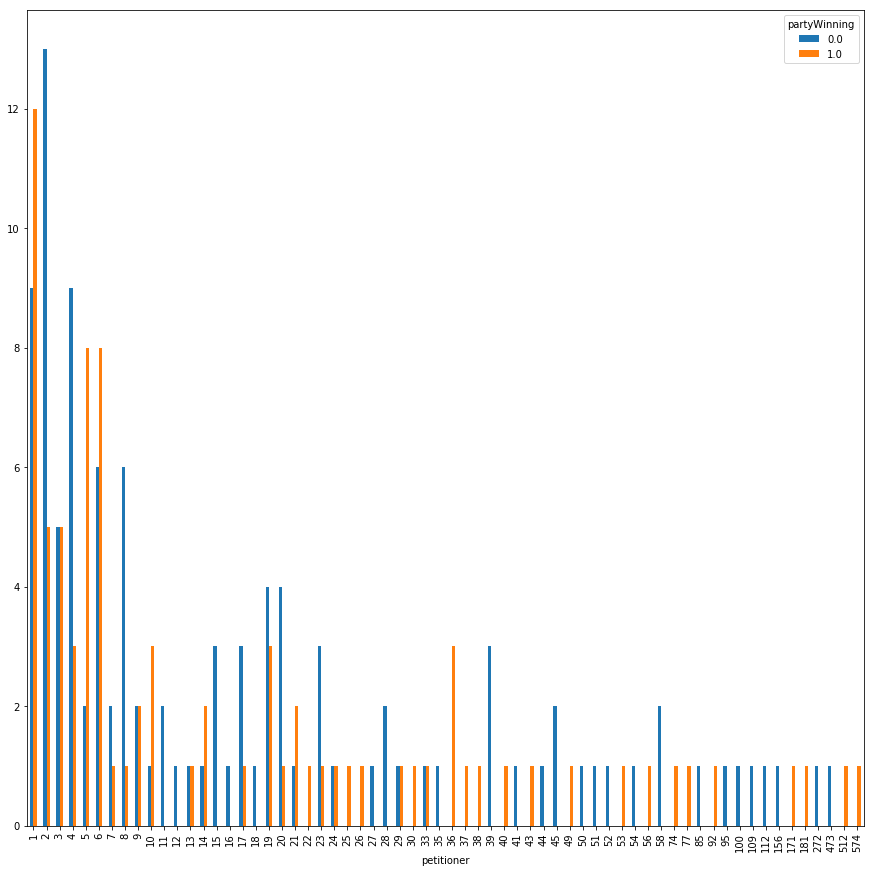

In [295]:
clarity_color_table3 = pd.crosstab(index=data2['petitioner'].value_counts(), 
                          columns=data2['partyWinning'])
clarity_color_table3.plot(kind="bar", 
                 figsize=(15,15),
                 stacked=False)

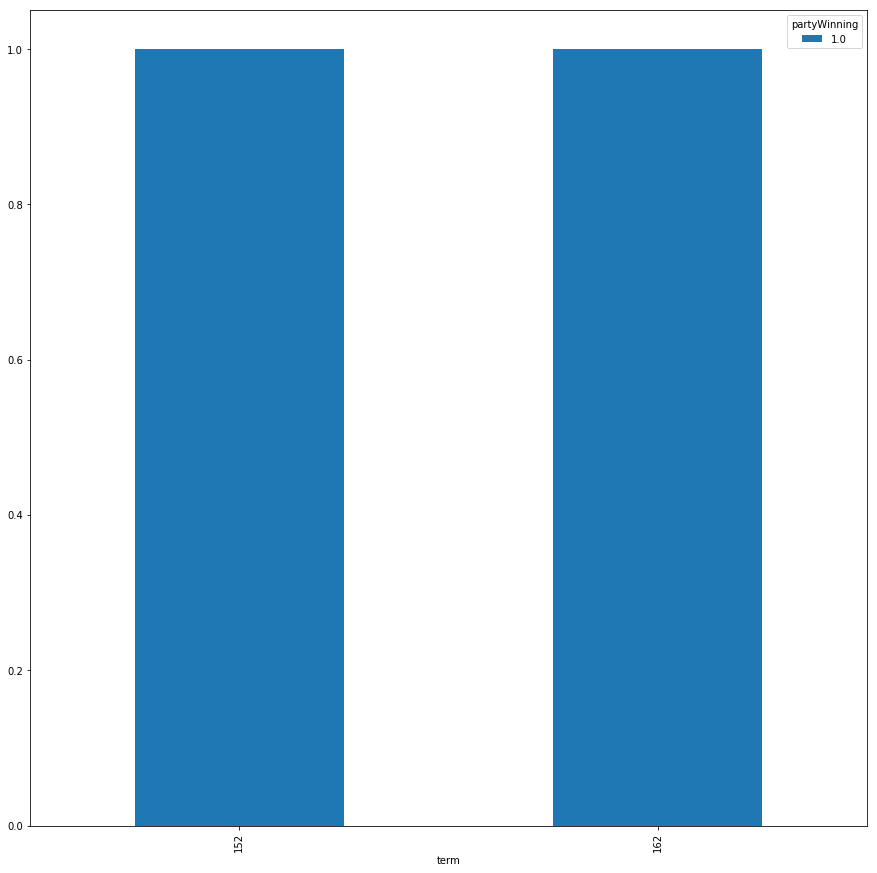

In [296]:
clarity_color_table3 = pd.crosstab(index=data2['term'].value_counts()[:3], 
                          columns=data2['partyWinning'])
clarity_color_table3.plot(kind="bar", 
                 figsize=(15,15),
                 stacked=False)